# Домашнее задание по библиотеке NetworkX

In [1]:
import networkx as nx

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## Задание 1 (1 балл)
Создайте граф и добавьте в него $5$ вершин с городами России, у каждой должен быть атрибут (характеристика) `time_diff`, означающий временную разницу с Москвой в часах.

В данном задании мы будем рассматривать следующие города:
- Краснодар - Краснодар
- Новосибирск - Новосиб
- Самара - Самара
- Якутск - Якутск
- Екатеринбург - ЕКБ

(-1.1651090334297538,
 1.2137304380294536,
 -1.150173948719925,
 1.1203356598621346)

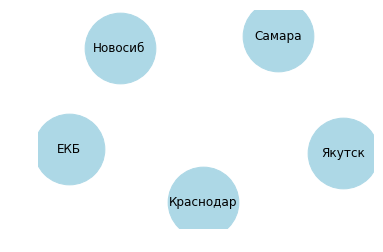

In [222]:
mur = nx.Graph()
mur.add_node('Краснодар', time_diff = 0)
mur.add_node('Новосиб', time_diff = 4)
mur.add_node('Самара', time_diff = 1)
mur.add_node('Якутск', time_diff = 6)
mur.add_node('ЕКБ', time_diff = 2)
nx.draw_networkx(mur, node_color='lightblue', node_size =5000)
plt.axis('off')

## Задание 2 (1 балл)
Выберите какую-нибудь конкретную авиакомпанию (Аэрофлот, S7, Utair, etc).

В созданный граф добавьте рёбра между выбранными $5$ю городами, между которыми есть авиарейсы данной компании. У каждого ребра должны быть следующие атрибуты:
- расстояние между городами в километрах `distance`
- время перелёта в минутах `time`

При желании можно добавить в граф также несколько городов, являющихся пересадочными пунктами.

(-0.8691318388271015,
 1.1719787839389848,
 -0.7454316868857458,
 0.8347452270818034)

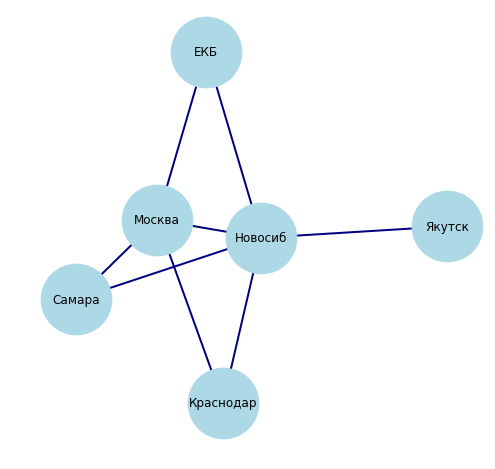

In [230]:
# мы взяли информацию с официального сайта авиакомпании S7 airlines
plt.figure(figsize = (8, 8))
mur.add_edge('Новосиб', 'Якутск', distance = 2759, time = 265)
mur.add_edge('Новосиб', 'ЕКБ', distance = 1398, time = 145)
mur.add_edge('Новосиб', 'Краснодар', distance = 3267, time = 275)
mur.add_edge('Новосиб', 'Самара', distance = 2129, time = 195)
mur.add_edge('Самара', 'Москва', distance = 853, time = 100)
mur.add_edge('ЕКБ', 'Москва', distance = 1416, time = 140)
mur.add_edge('Краснодар', 'Москва', distance = 1195, time = 145)
mur.add_edge('Новосиб', 'Москва', distance = 2811, time = 245)
nx.draw_networkx(mur, node_color='lightblue', node_size =5000, width =2, edge_color='navy')
plt.axis('off')

## Задание 3 (1 балл)
Выберите любую пару городов и постройте между ними следующие кратчайшие пути:
- без взвешивания
- со взвешиванием по расстоянию
- со взвешиванием по времени

In [232]:
nx.shortest_path(mur, 'Самара', 'Краснодар')

['Самара', 'Новосиб', 'Краснодар']

In [220]:
nx.shortest_path(mur, 'Самара', 'Краснодар', weight = 'distance')

['Самара', 'Москва', 'Краснодар']

In [219]:
nx.shortest_path(mur, 'Самара', 'Краснодар', weight = 'time')

['Самара', 'Москва', 'Краснодар']

Поясните полученные результаты.

В случае, если мы строим кратчайший путь между Самарой и Краснодаром без взвешивания, то будет показан тот путь, ребра которого были добавлены в граф раньше - таким образом, оказывается выведен путь из Самары в Краснодар через Новосибирск.
Однако оказывается, что кратчайший путь и по времени, и по расстоянию - через Москву, поскольку все 3 города расположены в европейской части России, и самолетам не придется делать крюк через Сибирь. Таким образом, получается, что невзвешенный граф не способен отражать реальную ситуацию.